# Tools to Search for Spatial Patterns

Often, we seek to identify specific tissue areas that harbor a particular type of interaction or combinations of cells. Understanding the underlying histology allows us to start formulating hypotheses about these patterns.

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### Identify regions of Aggregation (single cell type)

The `sm.tl.spatial_aggregate` function is instrumental in identifying spatial clusters of cells that share similar phenotypes throughout the tissue. For instance, it can be utilized to locate a tumor mass by adjusting the 'purity' parameter. This adjustment grants the ability to define the minimum required similarity percentage among cells within a certain radius to classify them as part of an aggregation region. Such precision in identifying areas of cellular aggregation enhances the analysis's accuracy. For example, once the tumor domain is pinpointed, its prevalence can be compared between treatment and control groups or across designated histological sites, facilitating a deeper understanding of the tumor's spatial dynamics and potential treatment impacts.

In [3]:
adata = sm.tl.spatial_aggregate(adata, method='radius', radius=50, purity=80, label='spatial_aggregate_radius')

Identifying neighbours within 50 pixels of every cell


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_aggregate.py:201: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



Let's visualize the results. 

In [4]:
sm.pl.voronoi(adata, color_by='spatial_aggregate_radius', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=7000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

TypeError: '<' not supported between instances of 'str' and 'float'

As observed, although most regions do not show significant enrichment of the specified cell types, there are certain areas that meet the established criteria.

### Identify regions of Aggregation (multiple cell type)

What if your interest lies in pinpointing areas where two or more cell types are in close proximity, potentially indicating functional significance? In that case, we can utilize the `spatial_pscore` function. Although its primary aim is to provide a quantitative measure of proximity, it also highlights the specific tissue regions where these mixed cell types are located.

In [7]:
# Calculate the score for proximity between `Tumor` cells and `Blood Vessels`
adata =  sm.tl.spatial_pscore (adata,proximity= ['ECAD+', 'SMA+'],
                               phenotype='phenotype',
                               method='radius',
                               radius=50)

Identifying neighbours within 50 pixels of every cell
Please check:
adata.obs['spatial_pscore'] &
adata.uns['spatial_pscore'] for results


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_pscore.py:243: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_pscore.py:253: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



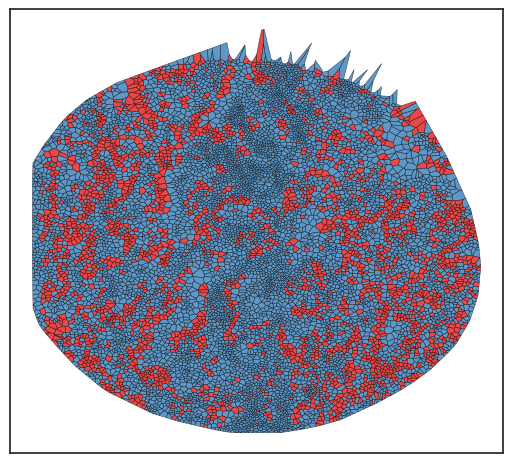

In [11]:
sm.pl.voronoi(adata, color_by='spatial_pscore', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=7000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

In the plot above, the regions highlighted in red indicate areas where tumor cells and blood vessels are found in close proximity.

### Search for regions of Aggregation based on Similarity

What if you've spotted an area of interest in a raw image and wish to explore whether there are other regions within that image, or across the dataset, sharing the same molecular composition? For this task, the `spatial_similarity_search` function is your go-to tool. A preliminary step for using this function is identifying a Region of Interest (ROI), preferably a small one for better specificity, using the `addROI_image` function. This identified ROI then serves as the input for the spatial similarity search. It's important to note that if multiple ROIs are used, an average of these regions will be taken as the basis for the search. Therefore, it's generally recommended to be precise in defining your ROI to ensure the specificity of your search results.

For the purpose of this tutorial I am just going to use one of the ROIs that we defined previously. 

In [16]:
adata = sm.tl.spatial_similarity_search(adata, ROI_column='ROI', similarity_threshold=0.4,
                                          ROI_subset=['ROI1'], method='radius', radius=40,
                                          label='tumor_similarity')

Identifying neighbours within 40 pixels of every cell


UnboundLocalError: local variable 'dist' referenced before assignment

In [14]:
# Let's look at the regions identified by the method
sm.pl.voronoi(adata, color_by='spatial_pscore', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=7000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

ROI
Other    8188
ROI2     2188
ROI1      825
Name: count, dtype: int64

### Save Results

In [ ]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')